/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 62ms/step - accuracy: 0.8618 - loss: 0.4550 - val_accuracy: 0.9844 - val_loss: 0.0472
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.9839 - loss: 0.0522 - val_accuracy: 0.9873 - val_loss: 0.0388
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 63ms/step - accuracy: 0.9894 - loss: 0.0337 - val_accuracy: 0.9902 - val_loss: 0.0292
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 62ms/step - accuracy: 0.9913 - loss: 0.0265 - val_accuracy: 0.9908 - val_loss: 0.0302
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 63ms/step - accuracy: 0.9931 - loss: 0.0217 - val_accuracy: 0.9914 - val_loss: 0.0267
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 62ms/step - accuracy: 0.9949 - loss: 0.0154 - val_accuracy: 0.9899 - val_loss: 0.0286
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.9954 - loss: 0.0146 - val_accuracy: 0.9907 - val_loss: 0.0324
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.9961 - loss: 0.0124 - 

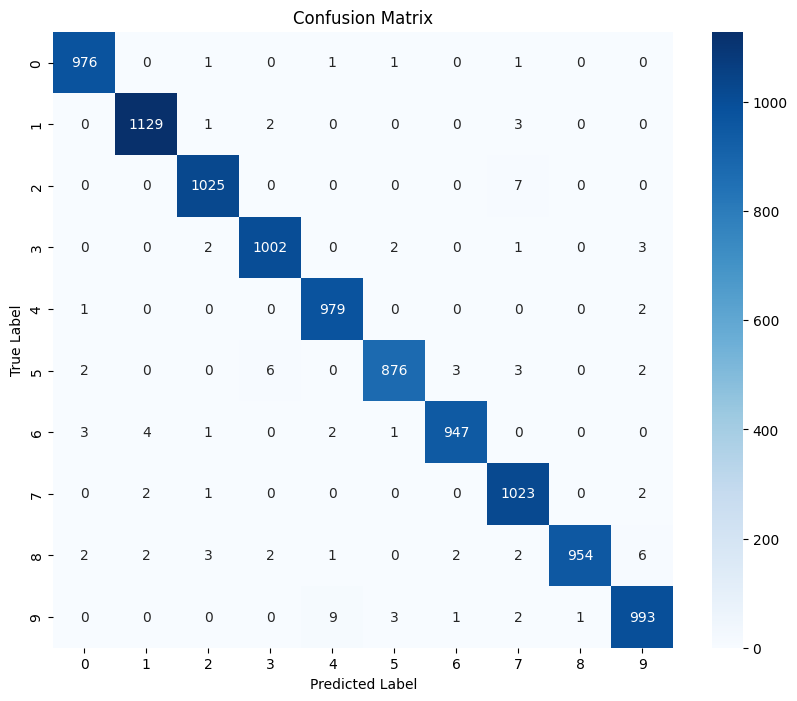

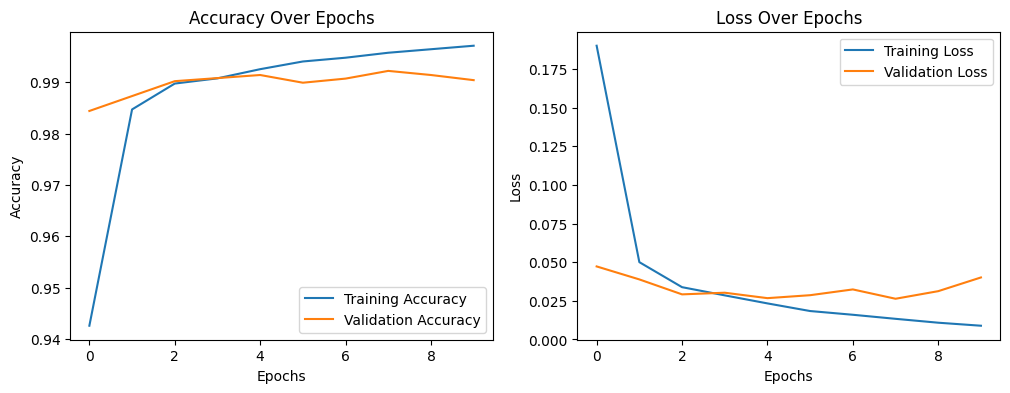

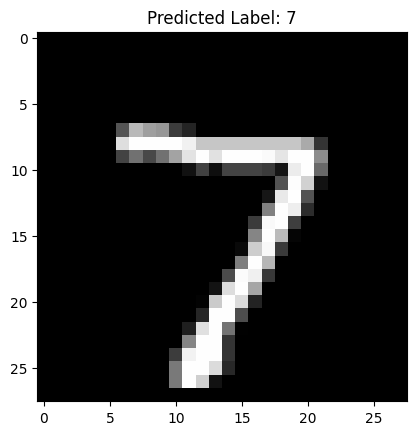

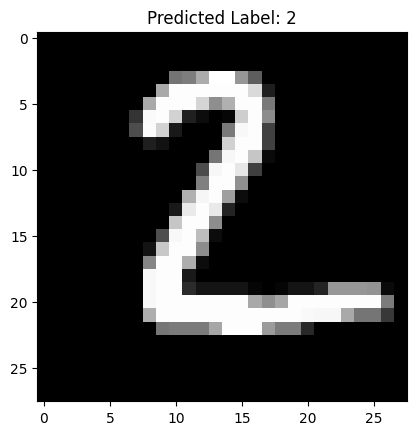

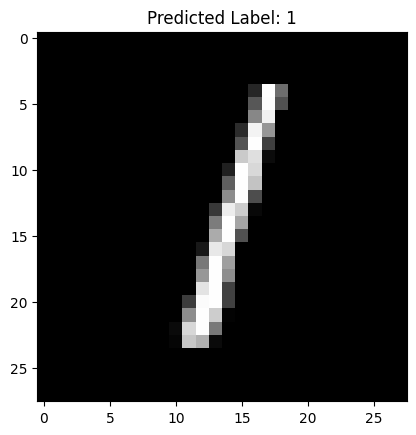

In [ ]:

"""
Este código construye y entrena una red neuronal convolucional (CNN) usando el dataset MNIST con Keras.
Incluye métricas adicionales y visualización de resultados, incluyendo precisión, matriz de confusión y gráficos de entrenamiento.
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Cargar el dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocesar los datos
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

# Construir el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo con más épocas
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels_categorical))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels_categorical)
print(f'Test accuracy: {test_acc}')

# obtener predicciones en el conjunto de prueba
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# generar reporte de clasificación
print("Classification Report:", classification_report(test_labels, predicted_labels))

# mostrar matriz de confusion
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Visualizar predicciones para tres imágenes de prueba
for i in range(3):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted Label: {np.argmax(predictions[i])}')
    plt.show()
